# Predicting Heart Disease using Machine Learning

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

# Load Data


In [6]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


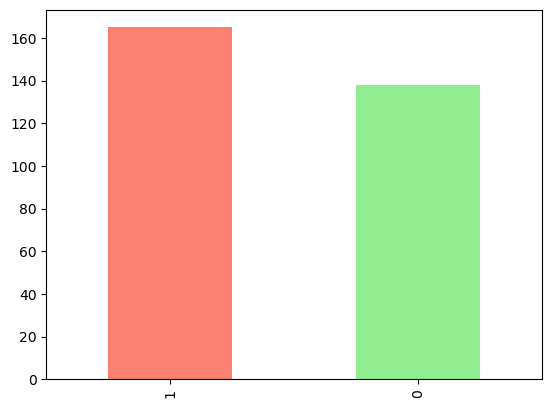

In [3]:
df["target"].value_counts().plot(kind="bar",color = ["salmon","lightgreen"]);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


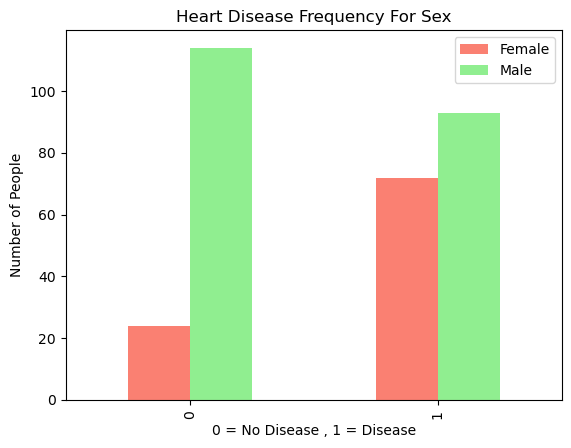

In [8]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",color = ["Salmon","LightGreen"])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Number of People")
plt.legend(["Female","Male"]);

## Age vs Max Heart rate for Heart Disease

In [9]:
df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

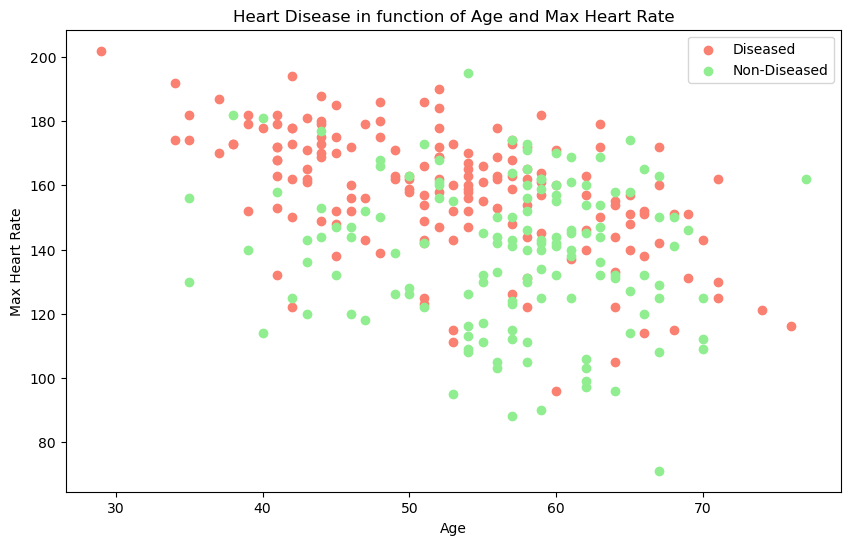

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color = "Salmon");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color = "Lightgreen")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseased","Non-Diseased"]);


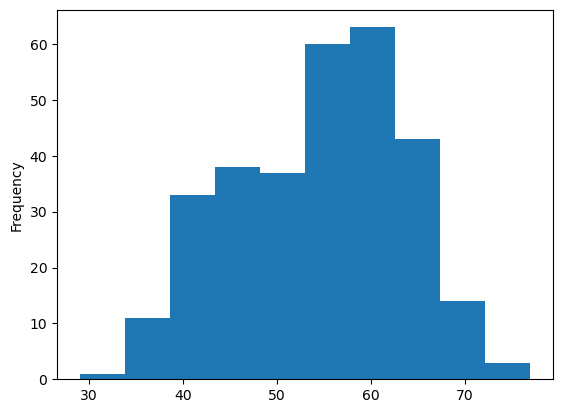

In [11]:
df.age.plot.hist();

# Heart Disease Frequency Per Chest Pain Type

In [12]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


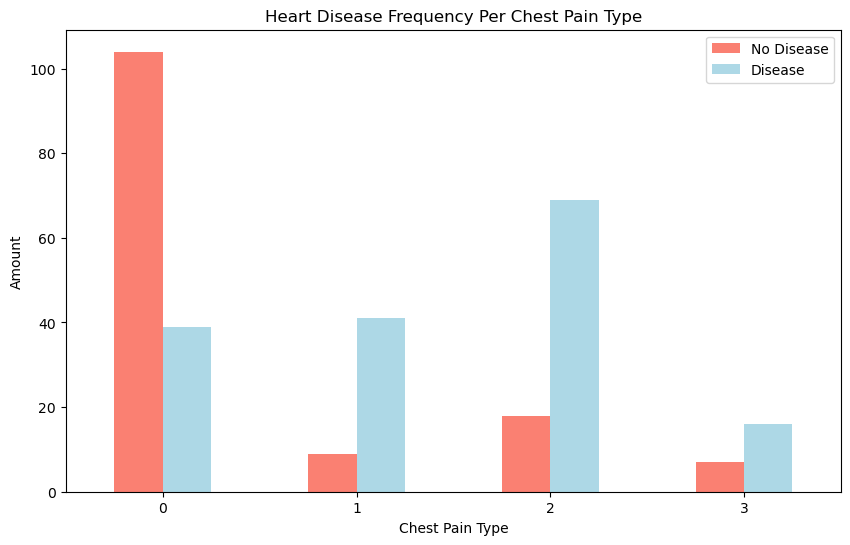

In [13]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

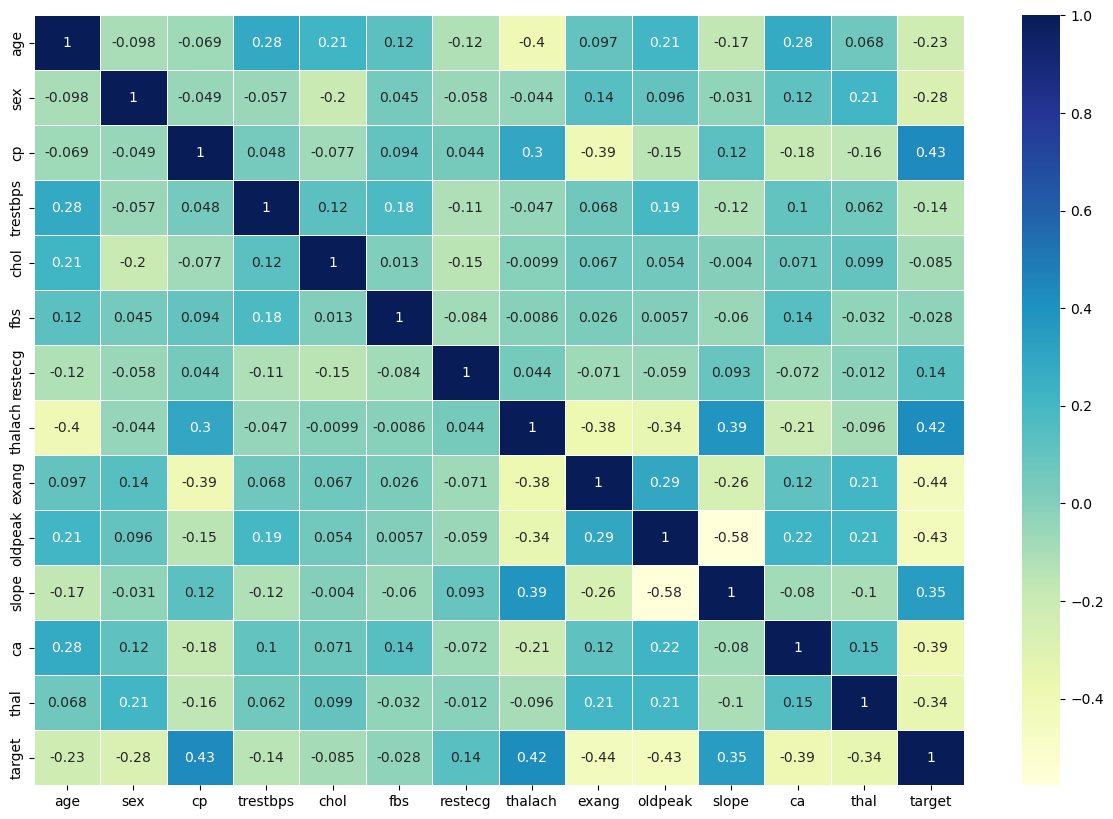

In [14]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap="YlGnBu"
                 );

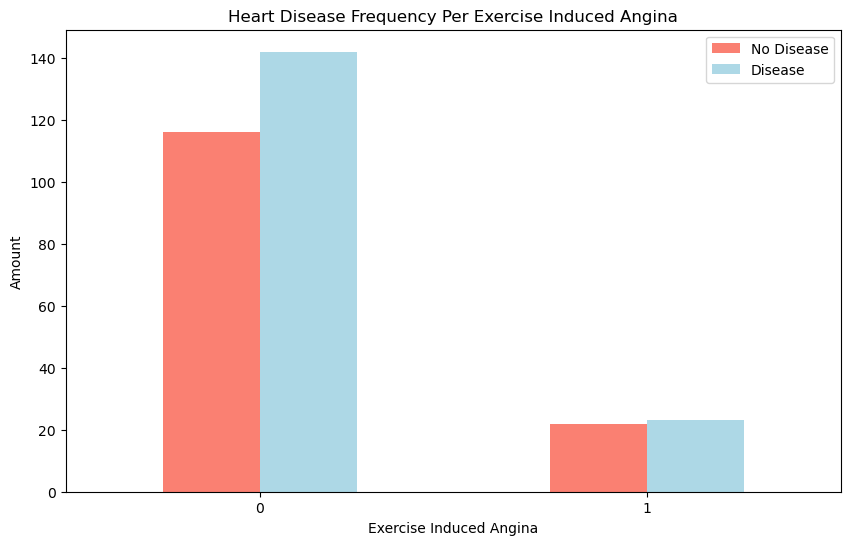

In [15]:
# Make the crosstab more visual
pd.crosstab(df.fbs, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [16]:
X = df.drop("target",axis=1)
Y = df.target

In [17]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
np.random.seed(45)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [21]:
Y_train

212    0
227    0
287    0
25     1
8      1
      ..
163    1
213    0
95     1
32     1
131    1
Name: target, Length: 242, dtype: int64

In [22]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest Regressor": RandomForestClassifier()}

def FitModel(models,X_train,Y_train,X_test,Y_test):
    np.random.seed(45)
    model_score = {}
    for name,model in models.items():
      model.fit(X_train,Y_train)
      model_score[name] = model.score(X_test,Y_test)
    return model_score


In [23]:
model_scores = FitModel(models,X_train,Y_train,X_test,Y_test)
model_scores

C:\Users\Sangram\desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.6721311475409836,
 'Random Forest Regressor': 0.8852459016393442}

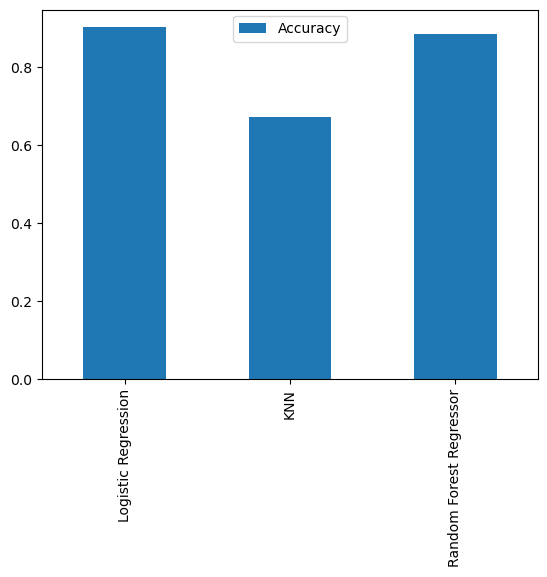

In [24]:
compare_models = pd.DataFrame(model_scores,index=["Accuracy"])
compare_models
compare_models.T.plot.bar();

The Maximum Score produced by KNN is 73.77%


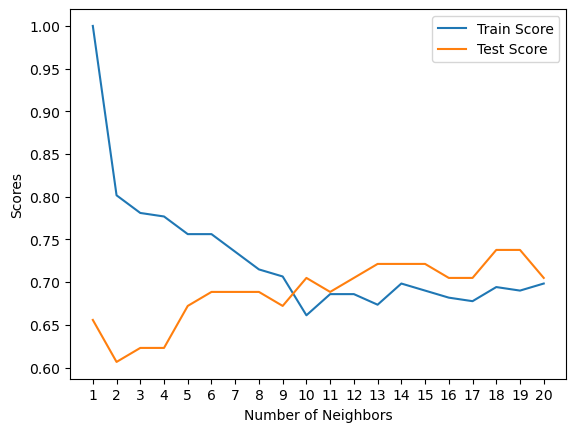

In [33]:
train_score = []
test_score = []
knn = KNeighborsClassifier()
neighbors = range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,Y_train)
    
    train_score.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))

plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.legend(["Train Score","Test Score"])
plt.xticks(np.arange(1,21))
print(f"The Maximum Score produced by KNN is {max(test_score)*100:.2f}%");

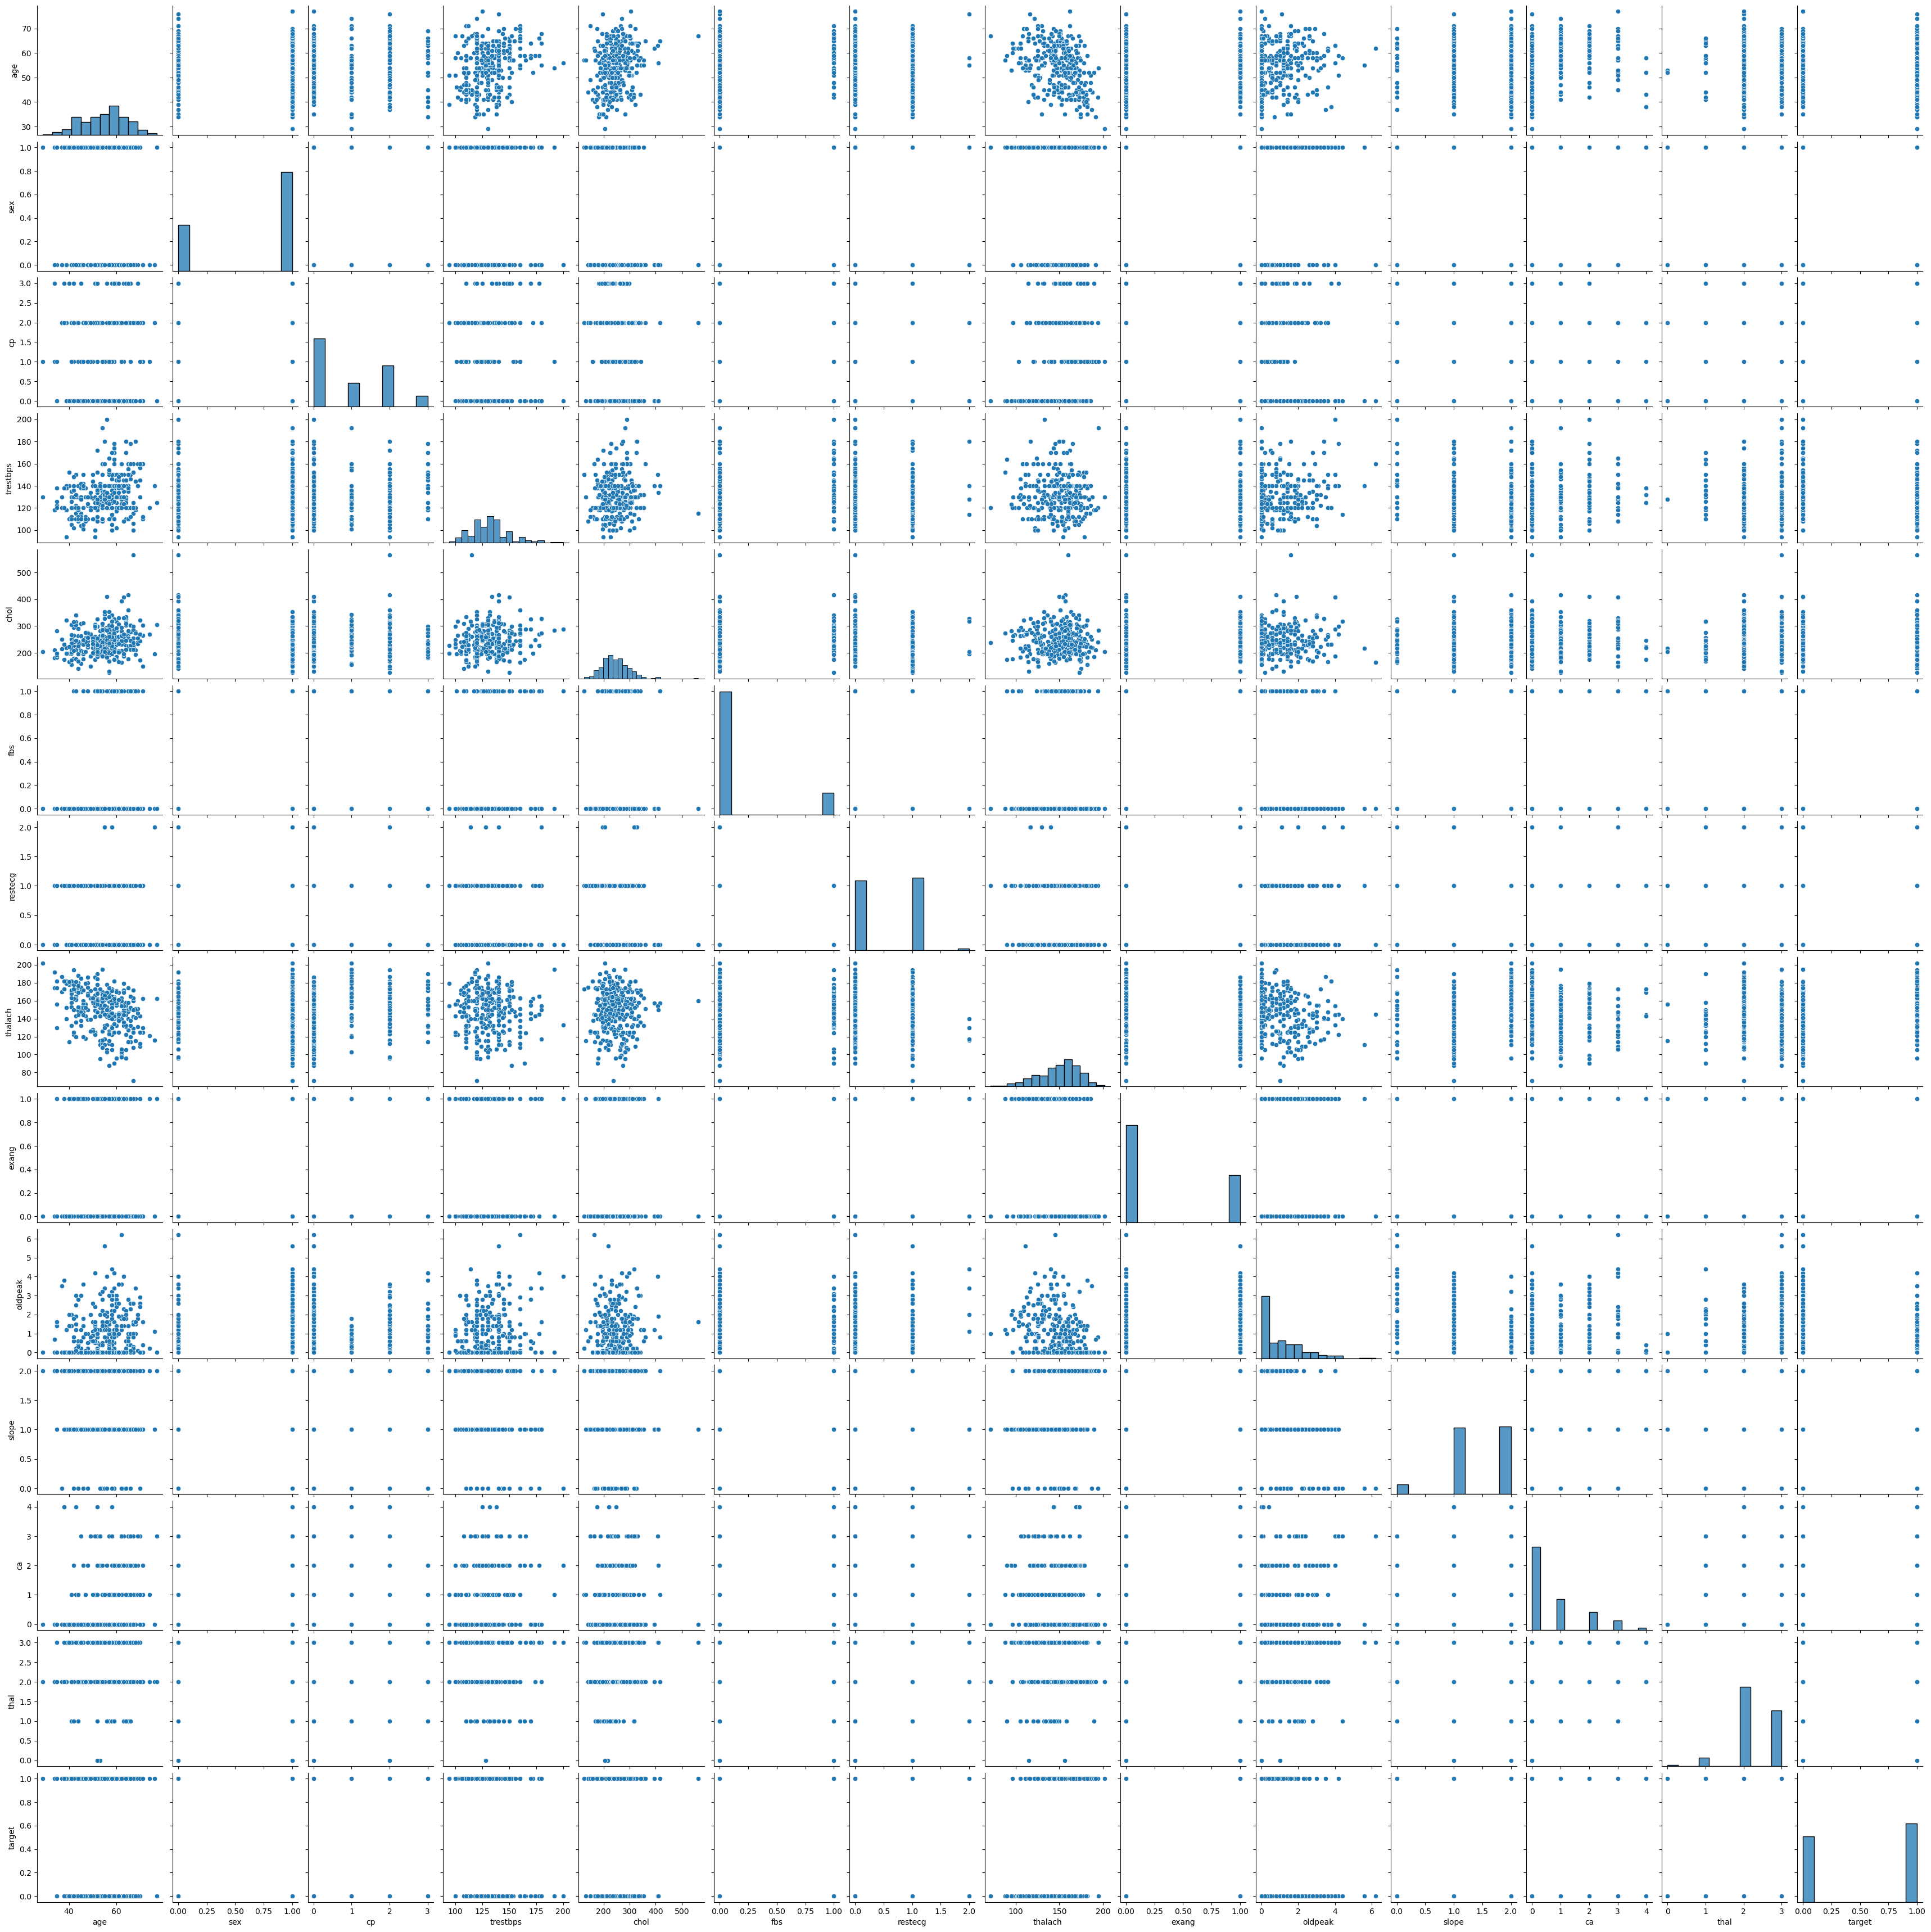

In [7]:
import seaborn as sns
sns.pairplot(df)